In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

calibration.pkl  exists.
file exists, loading
2459
(Timestamp('2019-01-13 00:00:00'), 'Barcelona', 'Eibar', 3, 0)
(Timestamp('2019-01-13 00:00:00'), 'Chaves', 'Tondela', 2, 1)


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17163,2019-01-03,BPL,Manchester City,Liverpool,2,1,1.01,1.52,1.11,1.62
17259,2019-01-12,BPL,West Ham United,Arsenal,1,0,0.82,0.85,1.50,1.07
17270,2019-01-12,BPL,Cardiff City,Huddersfield Town,0,0,0.16,0.47,0.65,1.58
17286,2019-01-12,BPL,Burnley,Fulham,2,1,0.87,1.07,0.98,0.89
17289,2019-01-12,BPL,Crystal Palace,Watford,1,2,1.11,1.75,1.83,1.13
17291,2019-01-12,BPL,Brighton and Hove Albion,Liverpool,0,1,0.44,2.46,0.63,2.38
17294,2019-01-12,BPL,Leicester City,Southampton,1,2,1.59,1.26,2.29,0.86
17311,2019-01-12,BPL,Chelsea,Newcastle,2,1,1.40,0.46,1.27,0.99
17333,2019-01-13,BPL,Everton,AFC Bournemouth,2,0,1.68,1.81,1.86,1.82
17340,2019-01-13,BPL,Tottenham Hotspur,Manchester United,0,1,2.14,0.90,3.04,0.63


In [3]:
Teams=dict()
League=dict()

In [4]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,25.5,17,33,5,1,40.56,66.49,4.20,0.39,9.43,2.5620
SPD,0,25.0,17,33,6,1,34.92,62.27,3.54,0.33,11.09,2.3718
BPL,0,20.5,13,28,7,1,8.97,24.83,3.11,0.40,38.05,1.8660
ISA,0,19.7,12,28,8,1,7.61,20.20,3.13,0.43,45.15,1.7841
PL,0,17.8,10,26,8,2,3.65,11.24,2.52,0.39,61.87,1.5372
FL1,0,16.0,8,24,8,2,1.80,5.83,3.16,0.56,74.72,1.3904
DE,0,15.8,8,24,8,2,1.71,5.77,3.31,0.59,76.09,1.3571
RPL,0,14.5,7,22,8,3,0.78,3.37,2.79,0.55,83.60,1.2555


In [16]:
country='SPD'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0.3247257  0.90834687]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Barcelona,43,84.7,76,93,1,1,96.15,100.00,6.91,0.35,0.00
Atletico Madrid,38,71.1,62,80,4,2,3.39,96.25,3.37,0.24,0.00
Sevilla FC,33,63.8,55,73,7,2,0.24,70.49,3.95,0.36,0.00
Real Madrid,30,62.9,53,72,8,2,0.18,62.10,4.43,0.39,0.01
Alavés,32,60.1,51,69,10,3,0.04,38.32,3.13,0.33,0.01
Getafe,28,55.0,46,64,13,4,0.00,11.93,2.53,0.28,0.20
Real Betis,26,53.8,45,63,14,4,0.00,8.98,3.06,0.34,0.65
Real Sociedad,22,51.8,43,61,16,5,0.00,4.85,3.00,0.31,1.50
Valencia,23,50.1,41,59,16,5,0.00,2.24,2.43,0.26,2.30
Espanyol,24,49.3,40,59,17,6,0.00,1.66,2.64,0.35,4.16


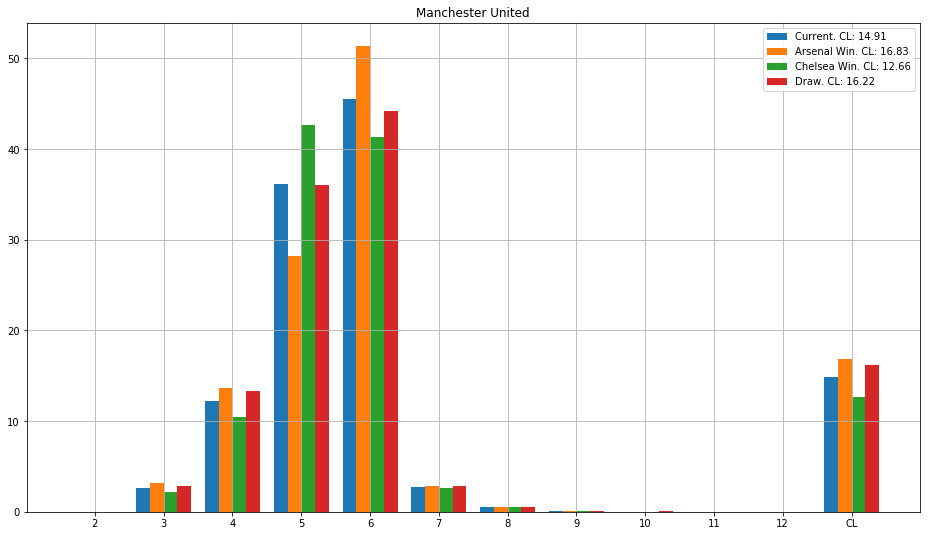

In [15]:
_,fig=PremierLeague.what_if('Arsenal v Chelsea',ref_team='Manchester United')

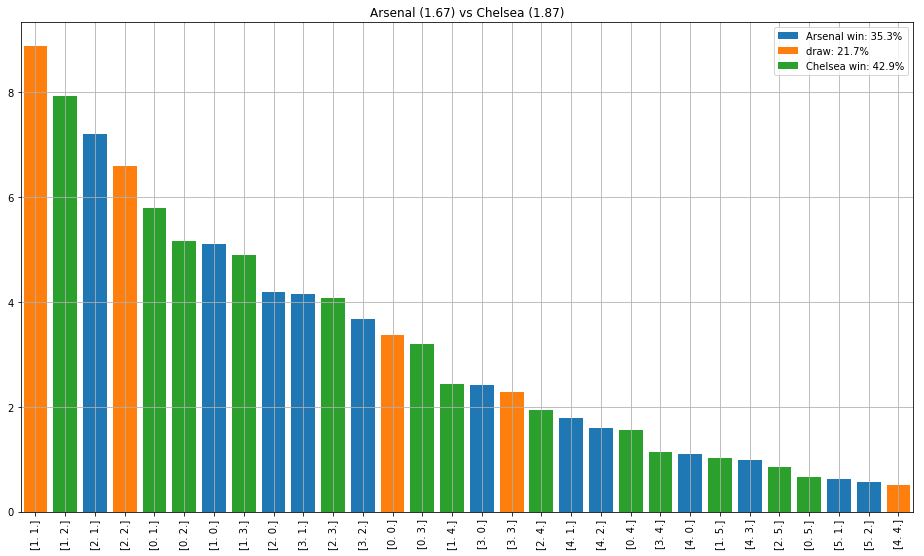

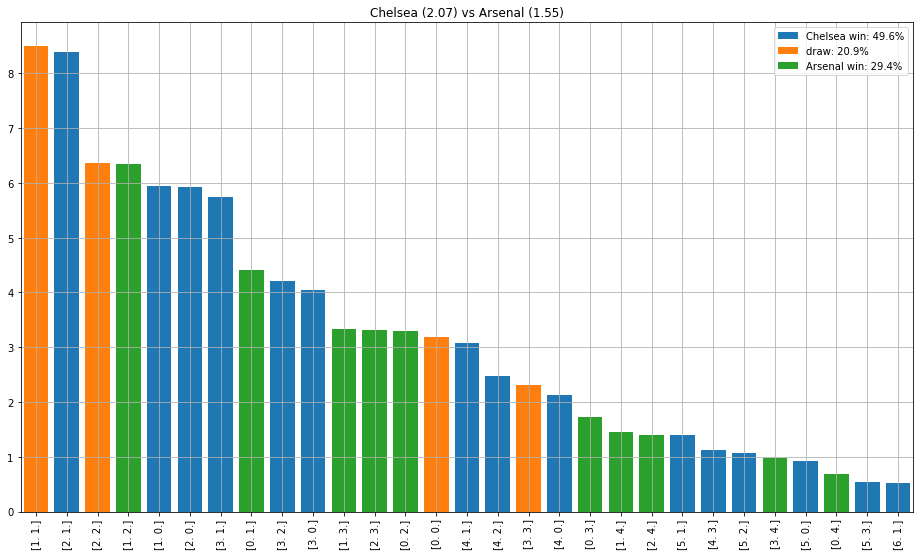

In [14]:
team1=teams['Manchester United']
team2=teams['Brighton and Hove Albion']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

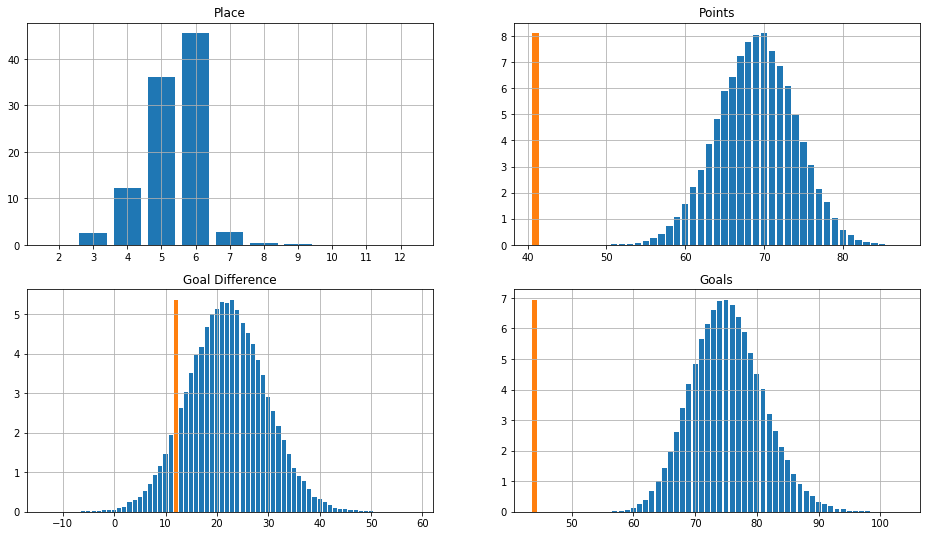

In [7]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

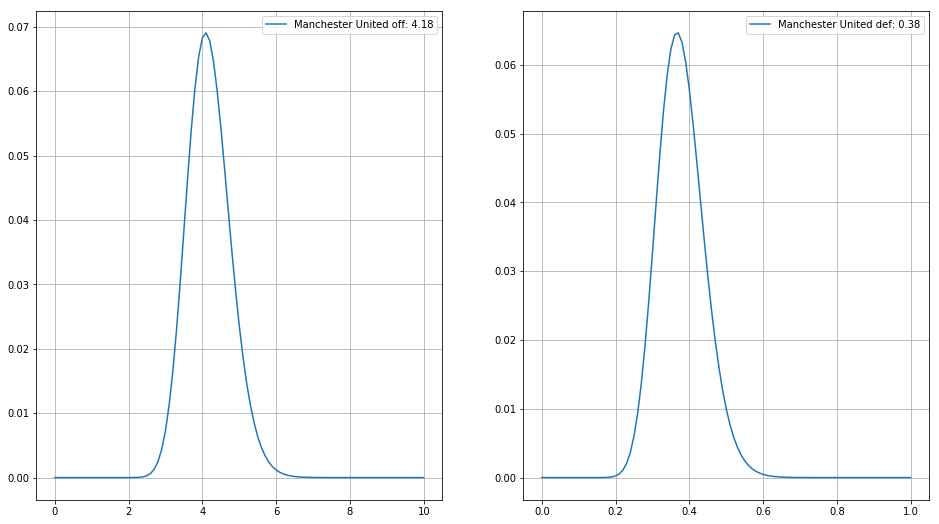

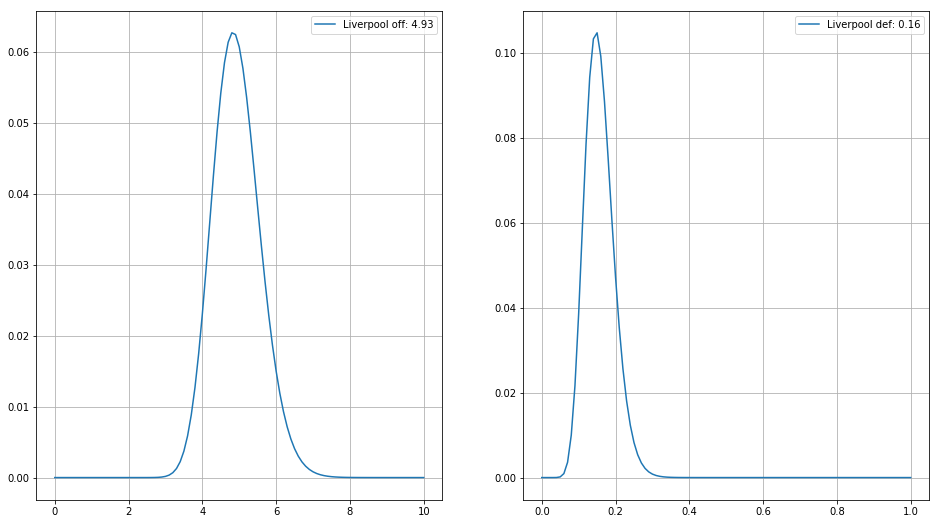

In [8]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

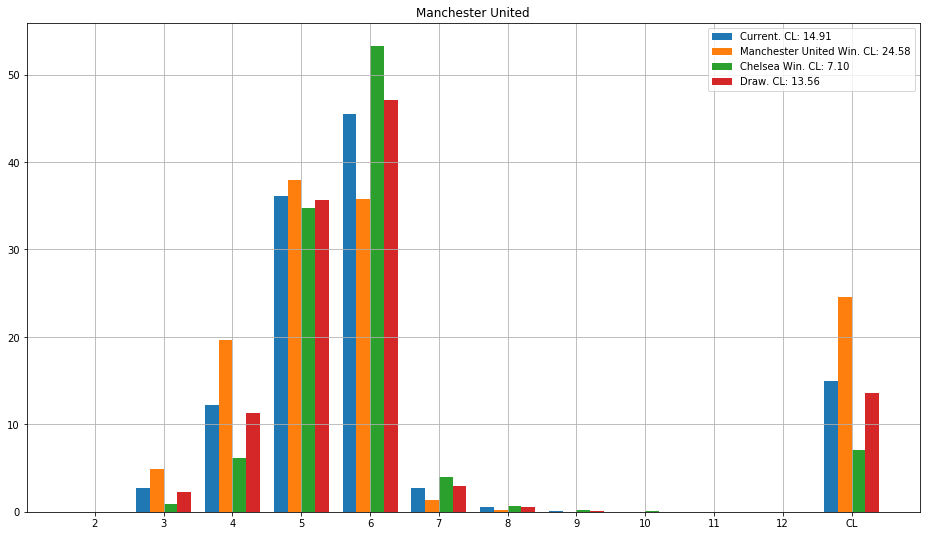

In [9]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl,_=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
_,fig=PremierLeague.what_if(the_match,ref_team=ref_team)

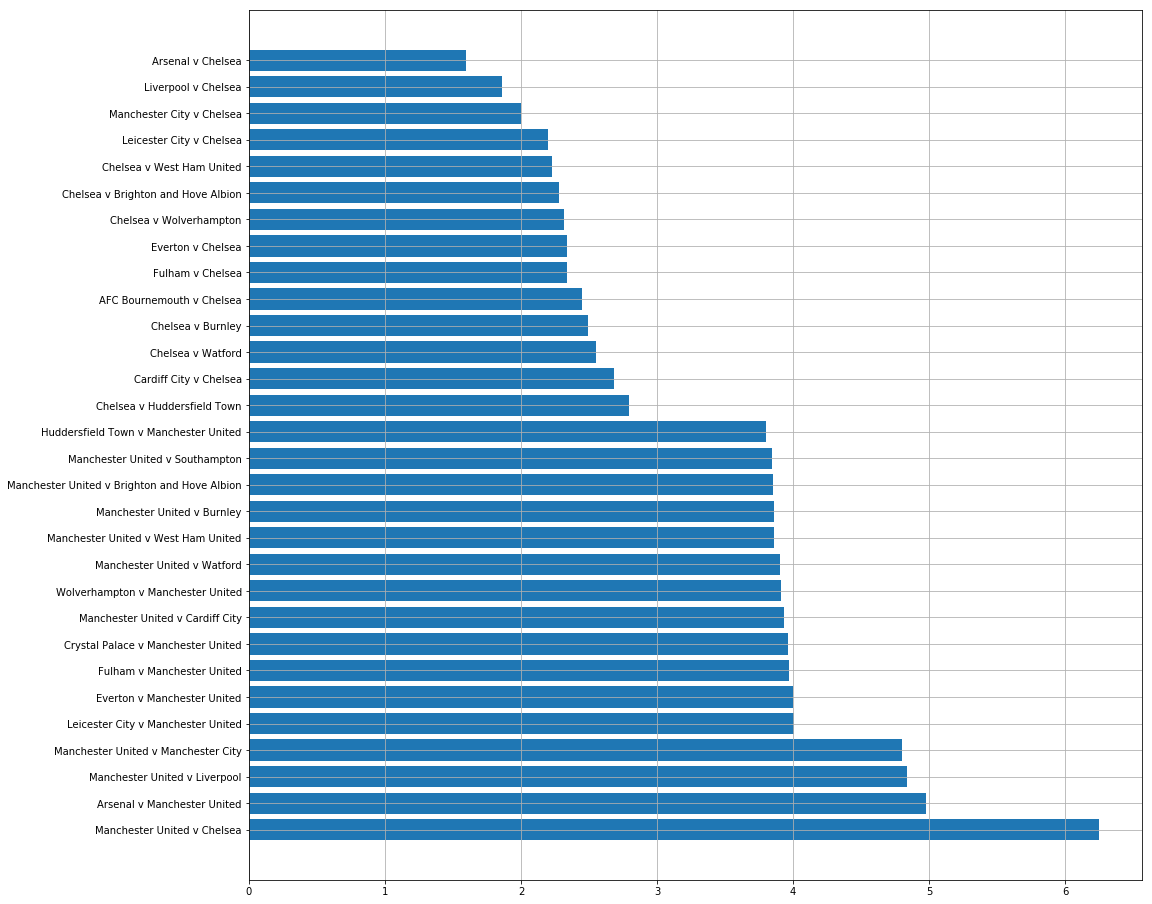

In [13]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[xx])
plt.yticks(xx,matches[xx],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.74992

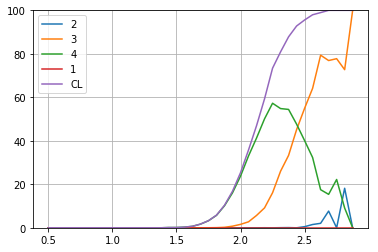

In [11]:
team_name='Manchester United'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n